# Lab 5: Insurance Costs

## Part One: Data Exploration 
The dataset we will study for this assignment contains information about health insurance costs for individuals with no dependents (children) in the United States. The information contained in the data is:

* Age of primary beneficiary

* Gender of primary beneficiary (only female, male recorded)

* Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* Whether the beneficiary smokes

* The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

* Individual medical costs billed by health insurance

You can find this data at: https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1

1. Read in the dataset, and display some summaries of the data.

In [16]:
# read in dataset
import pandas as pd
insurance = pd.read_csv(r"C:\Users\achur\OneDrive\Desktop\School\CP Fall 2024\544\GSB-544-2\insurance_costs_1.csv")
#insurance.head()
# display summary statistics
insurance.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


2. Fix any concerns you have about the data.

In [17]:
# fix concerns for the data
# create dummy variables
insurance = pd.get_dummies(insurance, columns= ["sex", "smoker"], drop_first = True)
insurance.head()

,age,bmi,region,charges,sex_male,smoker_yes
0,19,27.900,southwest,16884.92400,False,True
1,33,22.705,northwest,21984.47061,True,False
2,32,28.880,northwest,3866.85520,True,False
3,31,25.740,southeast,3756.62160,False,False
4,60,25.840,northwest,28923.13692,False,False


3. Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

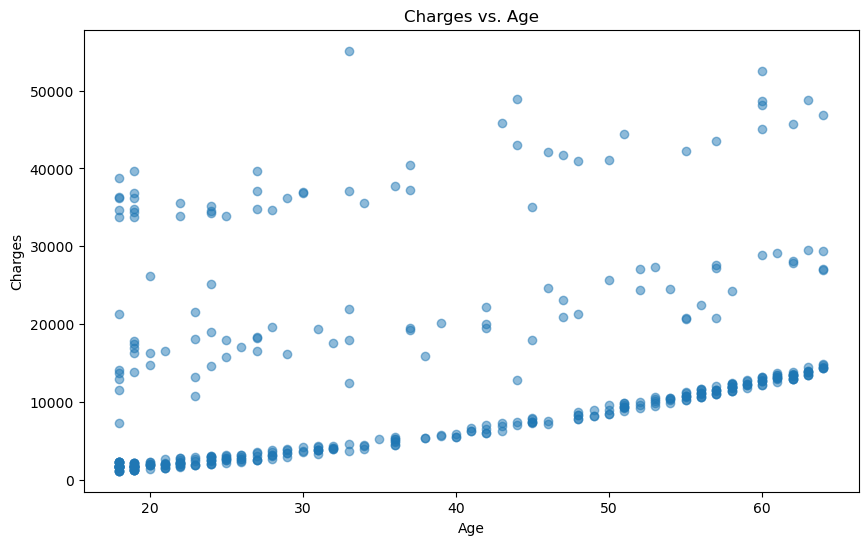

In [18]:
# make 3 plots comparing response variable to one predictor variable
# plot 1: charges vs. age
import matplotlib.pyplot as plt

# define figure size
plt.figure(figsize=(10,6))
# define variables chosen
plt.scatter(insurance['age'], insurance['charges'], alpha = 0.5)
# create title name
plt.title("Charges vs. Age")
# create x axis name
plt.xlabel("Age")
# create y axis name
plt.ylabel("Charges")
plt.show()

Description of plot: When comparing charges with age, there is an increase in charges with the increase in age suggests that insurance companies may determine age as a factor of health risk when determining health insurance premiums. 

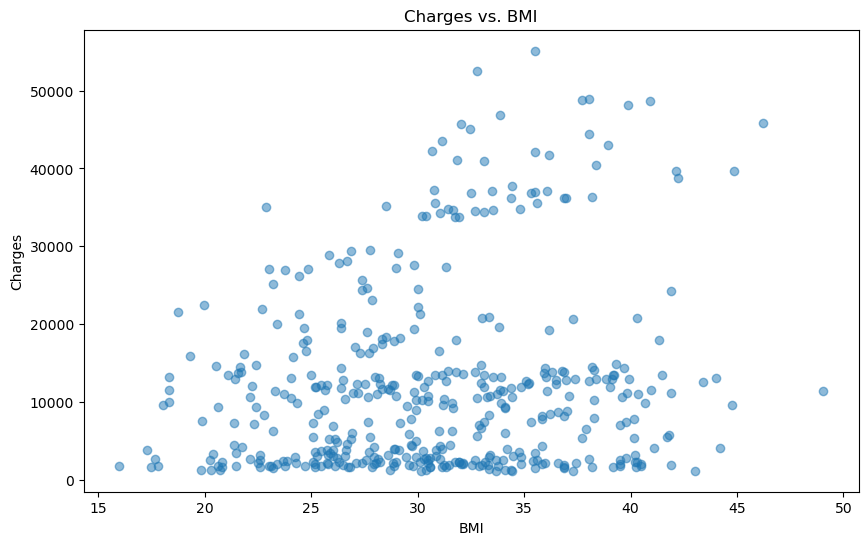

In [19]:
# plot 2: charges vs. bmi

# define figure size
plt.figure(figsize = (10, 6))
# define which variables are chosen
plt.scatter(insurance['bmi'], insurance['charges'], alpha = 0.5)
# choose title name
plt.title('Charges vs. BMI')
# choose x axis name
plt.xlabel('BMI')
# choose y label name
plt.ylabel('Charges')
plt.show()

Description of plot: When comparing charges with BMI, there is a general trend of higher BMIs being associated with higher charges which suggests that insurance companies view higher BMI has a health risk that could lead to other health complications which would result in a higher health insurance premium.

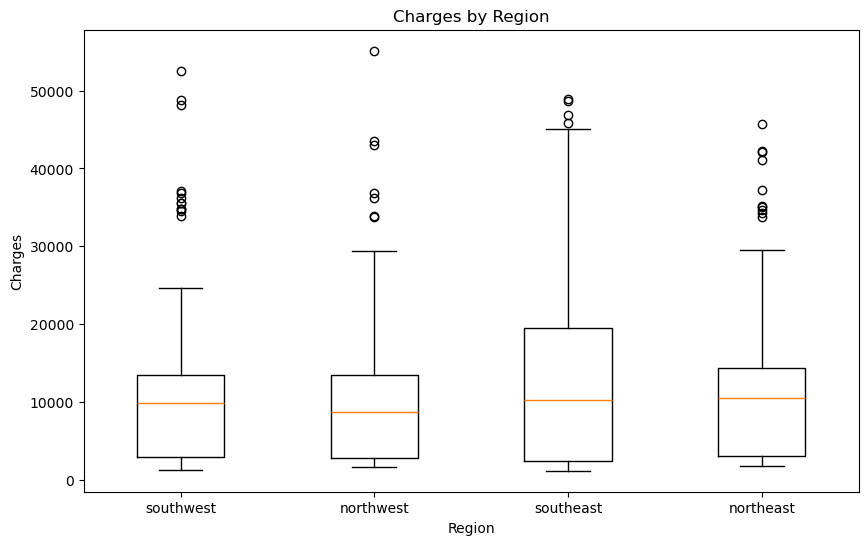

In [20]:
# plot 3: charges by region

#define figure size
plt.figure(figsize=(10,6))
#select regions
regions = insurance['region'].unique()
charges_by_region = [insurance[insurance['region'] == region]['charges'] for region in regions]
# create box plot
plt.boxplot(charges_by_region, labels = regions)
# create plot name
plt.title('Charges by Region')
# create x axis name
plt.xlabel('Region')
# create y label name
plt.ylabel('Charges')
plt.show()

Description of plot: When comparing charges by region, there is not a clear trend of a region having higher or lower charges than another. A potential unseen influence could be due to differences in health lifestyle or demographics for each region.

## Part Two: Simple Linear Models
1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [46]:
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.model_selection import *

# define predictor and response variable
X = insurance[['age']]
y = insurance['charges']
# split into training and test sets
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
# create linear model
model1 = LinearRegression()
model1.fit(X_train,y_train)
# coefficient and intercept
intercept = model1.intercept_
age_coefficient = model1.coef_[0]
# make predictions
y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)
# performance metrics
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)
r_squared_train = r2_score(y_train, y_pred_train)
# print model summary
print("Model Summary 1 (Age)")
print("-" * 50)
print(f"Intercept: {intercept:.2f}")
print(f"Age Coefficient: {age_coefficient:.2f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test:.2f}")
print(f"Mean Squared Error (MSE) on Training Set: {mse_train:.2f}")
print(f"R-squared on Test Set: {r_squared_test:.2f}")
print(f"R-squared on Training Set: {r_squared_train:.2f}")
print("-" * 50)

# reference used for printing summary: https://www.geeksforgeeks.org/multiple-linear-regression-with-scikit-learn/

Model Summary 1 (Age)
--------------------------------------------------
Intercept: 3769.22
Age Coefficient: 231.67
Mean Squared Error (MSE) on Test Set: 87360446.32
Mean Squared Error (MSE) on Training Set: 136790047.54
R-squared on Test Set: 0.12
R-squared on Training Set: 0.09
--------------------------------------------------
Model Summary 1 (Age)
--------------------------------------------------
Intercept: 3769.22
Age Coefficient: 231.67
Mean Squared Error (MSE) on Test Set: 87360446.32
Mean Squared Error (MSE) on Training Set: 136790047.54
R-squared on Test Set: 0.12
R-squared on Training Set: 0.09
--------------------------------------------------


Discussion of the model fit: The age coefficient represents the increase in health insurance charges for each additional year of a candidate. The training set MSE measures the average squared difference between the actual and predicted charges in the training set. A lower MSE indicates that the model fits the training data well, but this model has a high MSE. The test set MSE is not close to the training set MSE so the model does not generalize well to new data. It also is not higher than the training MSE so there is not overfitting. The training set R^2 is low which suggests that age by itself does not account for much of the variability in charges. The test set R^2 is only a little bit higher and explains the variability in insurance charges for new data. 

2. Make a model that also incorporates the variable sex. Report your results.

In [54]:
# define predictor and response variable
X = insurance[['age', 'sex_male']]
y = insurance['charges']
# split into training and test sets
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
# create linear model
model2 = LinearRegression()
model2.fit(X_train,y_train)
# coefficient and intercept
intercept = model2.intercept_
age_coefficient = model2.coef_[0]
sex_coefficient = model2.coef_[1]
# make predictions
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)
# performance metrics
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)
r_squared_train = r2_score(y_train, y_pred_train)
# print model summary
print("Model Summary 2 (Age and Sex)")
print("-" * 50)
print(f"Intercept: {intercept:.2f}")
print(f"Age Coefficient: {age_coefficient:.2f}")
print(f"Sex (Male) Coefficient: {sex_coefficient:.2f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test:.2f}")
print(f"Mean Squared Error (MSE) on Training Set: {mse_train:.2f}")
print(f"R-squared on Test Set: {r_squared_test:.2f}")
print(f"R-squared on Training Set: {r_squared_train:.2f}")
print("-" * 50)

Model Summary 2 (Age and Sex)
--------------------------------------------------
Intercept: 3331.48
Age Coefficient: 231.51
Sex (Male) Coefficient: 936.42
Mean Squared Error (MSE) on Test Set: 87817757.43
Mean Squared Error (MSE) on Training Set: 136571435.09
R-squared on Test Set: 0.11
R-squared on Training Set: 0.10
--------------------------------------------------
Model Summary 2 (Age and Sex)
--------------------------------------------------
Intercept: 3331.48
Age Coefficient: 231.51
Sex (Male) Coefficient: 936.42
Mean Squared Error (MSE) on Test Set: 87817757.43
Mean Squared Error (MSE) on Training Set: 136571435.09
R-squared on Test Set: 0.11
R-squared on Training Set: 0.10
--------------------------------------------------


3. Now make a model that does not include sex, but does include smoker. Report your results.

In [53]:
# define predictor and response variable
X = insurance[['age', 'smoker_yes']]
y = insurance['charges']
# split into training and test sets
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
# create linear model
model3 = LinearRegression()
model3.fit(X_train,y_train)
# coefficient and intercept
intercept = model3.intercept_
age_coefficient = model3.coef_[0]
smoker_coefficient = model3.coef_[1]
# make predictions
y_pred_train = model3.predict(X_train)
y_pred_test = model3.predict(X_test)
# performance metrics
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)
r_squared_train = r2_score(y_train, y_pred_train)
# print model summary
print("Model Summary 3 (Age and Smoker)")
print("-" * 50)
print(f"Intercept: {intercept:.2f}")
print(f"Age Coefficient: {age_coefficient:.2f}")
print(f"Smoker(Yes) Coefficient: {smoker_coefficient:.2f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test:.2f}")
print(f"Mean Squared Error (MSE) on Training Set: {mse_train:.2f}")
print(f"R-squared on Test Set: {r_squared_test:.2f}")
print(f"R-squared on Training Set: {r_squared_train:.2f}")
print("-" * 50)

Model Summary 3 (Age and Smoker)
--------------------------------------------------
Intercept: -1948.08
Age Coefficient: 247.45
Smoker(Yes) Coefficient: 25170.80
Mean Squared Error (MSE) on Test Set: 33276382.05
Mean Squared Error (MSE) on Training Set: 34166961.28
R-squared on Test Set: 0.66
R-squared on Training Set: 0.77
--------------------------------------------------
Model Summary 3 (Age and Smoker)
--------------------------------------------------
Intercept: -1948.08
Age Coefficient: 247.45
Smoker(Yes) Coefficient: 25170.80
Mean Squared Error (MSE) on Test Set: 33276382.05
Mean Squared Error (MSE) on Training Set: 34166961.28
R-squared on Test Set: 0.66
R-squared on Training Set: 0.77
--------------------------------------------------


4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

Model 3 (model in Q3) better fits the data. Model 3 has lower MSE values than Model 2. Model 3 also has higher R^2 values than Model 2. 

## Part Three: Multiple Linear Models

Now let’s consider including multiple quantitative predictors.

1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [55]:
# define predictor and response variables
X = insurance[['age', 'bmi']]
y = insurance['charges']
# split into training and test sets
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
# create model
model4 = LinearRegression()
model4.fit(X_train, y_train)
# intercept and coefficients
intercept = model4.intercept_
age_coefficient = model4.coef_[0]
bmi_coefficient = model4.coef_[1]
# make predictions
y_pred_train = model4.predict(X_train)
y_pred_test = model4.predict(X_test)
# performance metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mes_test = mean_squared_error(y_test, y_pred_test)
r_squared_train = r2_score(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)
# print summary
print("Model Summary 4 (Age and BMI)")
print("-" * 50)
print(f"Intercept: {intercept:.2f}")
print(f"Age Coefficient: {age_coefficient:.2f}")
print(f"BMI Coefficient: {bmi_coefficient:.2f}")
print(f"Mean Squared Error (MSE) on Training Set: {mse_train:.2f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test:.2f}")
print(f"R-squared on Training Set: {r_squared_train:.2f}")
print(f"R-squared on Test Set: {r_squared_test:.2f}")
print("-" * 50)

Model Summary 4 (Age and BMI)
--------------------------------------------------
Intercept: -4118.93
Age Coefficient: 213.52
BMI Coefficient: 274.78
Mean Squared Error (MSE) on Training Set: 133997790.55
Mean Squared Error (MSE) on Test Set: 87817757.43
R-squared on Training Set: 0.11
R-squared on Test Set: 0.15
--------------------------------------------------
Model Summary 4 (Age and BMI)
--------------------------------------------------
Intercept: -4118.93
Age Coefficient: 213.52
BMI Coefficient: 274.78
Mean Squared Error (MSE) on Training Set: 133997790.55
Mean Squared Error (MSE) on Test Set: 87817757.43
R-squared on Training Set: 0.11
R-squared on Test Set: 0.15
--------------------------------------------------


The MSE for this model is higher than in Model 1; however, the R^2 is higher in this model than in Model 1.

2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [58]:
# define predictor and response variable
insurance['age_squared'] = insurance['age'] ** 2
X = insurance[['age', 'age_squared']]
y = insurance['charges']
# split into training and test sets
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
# create linear model
model5 = LinearRegression()
model5.fit(X_train,y_train)
# coefficient and intercept
intercept = model5.intercept_
age_coefficient = model5.coef_[0]
age_squared_coefficient = model5.coef_[1]
# make predictions
y_pred_train = model5.predict(X_train)
y_pred_test = model5.predict(X_test)
# performance metrics
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)
r_squared_train = r2_score(y_train, y_pred_train)
# print model summary
print("Model Summary 5 (Age and Age^2)")
print("-" * 50)
print(f"Intercept: {intercept:.2f}")
print(f"Age Coefficient: {age_coefficient:.2f}")
print(f"Age^2 Coefficient: {age_squared_coefficient:.2f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test:.2f}")
print(f"Mean Squared Error (MSE) on Training Set: {mse_train:.2f}")
print(f"R-squared on Test Set: {r_squared_test:.2f}")
print(f"R-squared on Training Set: {r_squared_train:.2f}")
print("-" * 50)

Model Summary 5 (Age and Age^2)
--------------------------------------------------
Intercept: 3979.93
Age Coefficient: 218.86
Age^2 Coefficient: 0.16
Mean Squared Error (MSE) on Test Set: 87413315.31
Mean Squared Error (MSE) on Training Set: 136789294.88
R-squared on Test Set: 0.12
R-squared on Training Set: 0.09
--------------------------------------------------
Model Summary 5 (Age and Age^2)
--------------------------------------------------
Intercept: 3979.93
Age Coefficient: 218.86
Age^2 Coefficient: 0.16
Mean Squared Error (MSE) on Test Set: 87413315.31
Mean Squared Error (MSE) on Training Set: 136789294.88
R-squared on Test Set: 0.12
R-squared on Training Set: 0.09
--------------------------------------------------


The MSE in this model is still higher than that of Model 1. The R^2 for Model 1 and this model are the exact same. 

3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [60]:
from sklearn.preprocessing import PolynomialFeatures
# define predictor and response variables
X = insurance[['age']]
y = insurance['charges']
# create polynomial features
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X)
# training and test sets
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=seed)
# create model
model6 = LinearRegression()
model6.fit(X_train, y_train)
#intercepts and coefficients
intercept = model6.intercept_
coefficients = model6.coef_
# make predictions
y_pred_train = model6.predict(X_train)
y_pred_test = model6.predict(X_test)
# performance metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r_squared_train = r2_score(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)
# print summary
print("Model Summary 6 (Polynomial Degree 4)")
print("-" * 50)
print(f"Intercept: {intercept:.2f}")
print("Coefficients:", coefficients)
print(f"Mean Squared Error (MSE) on Training Set: {mse_train:.2f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test:.2f}")
print(f"R-squared on Training Set: {r_squared_train:.2f}")
print(f"R-squared on Test Set: {r_squared_test:.2f}")
print("-" * 50)

Model Summary 6 (Polynomial Degree 4)
--------------------------------------------------
Intercept: 72752.56
Coefficients: [-8.18722967e+03  3.59319954e+02 -6.37922325e+00  4.01176274e-02]
Mean Squared Error (MSE) on Training Set: 135773899.30
Mean Squared Error (MSE) on Test Set: 85868140.40
R-squared on Training Set: 0.10
R-squared on Test Set: 0.13
--------------------------------------------------
Model Summary 6 (Polynomial Degree 4)
--------------------------------------------------
Intercept: 72752.56
Coefficients: [-8.18722967e+03  3.59319954e+02 -6.37922325e+00  4.01176274e-02]
Mean Squared Error (MSE) on Training Set: 135773899.30
Mean Squared Error (MSE) on Test Set: 85868140.40
R-squared on Training Set: 0.10
R-squared on Test Set: 0.13
--------------------------------------------------


The MSE in this model is lower than in Model 1. The R^2 in this model is higher than in Model 1.

4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [62]:
# define predictor and response variables
X = insurance[['age']]
y = insurance['charges']
# create polynomial features
poly = PolynomialFeatures(degree=12, include_bias=False)
X_poly = poly.fit_transform(X)
# training and test sets
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=seed)
# create model
model7 = LinearRegression()
model7.fit(X_train, y_train)
#intercepts and coefficients
intercept = model7.intercept_
coefficients = model7.coef_
# make predictions
y_pred_train = model7.predict(X_train)
y_pred_test = model7.predict(X_test)
# performance metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r_squared_train = r2_score(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)
# print summary
print("Model Summary 7 (Polynomial Degree 12)")
print("-" * 50)
print(f"Intercept: {intercept:.2f}")
print("Coefficients:", coefficients)
print(f"Mean Squared Error (MSE) on Training Set: {mse_train:.2f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test:.2f}")
print(f"R-squared on Training Set: {r_squared_train:.2f}")
print(f"R-squared on Test Set: {r_squared_test:.2f}")
print("-" * 50)

Model Summary 7 (Polynomial Degree 12)
--------------------------------------------------
Intercept: 5773.16
Coefficients: [ 7.19787645e-10 -1.88832463e-05  5.05538737e-07  8.28625256e-06
  9.87498276e-05  6.58736172e-04 -7.38730627e-05  3.38316127e-06
 -8.06047646e-08  1.04669599e-09 -6.96634367e-12  1.83330286e-14]
Mean Squared Error (MSE) on Training Set: 135081652.13
Mean Squared Error (MSE) on Test Set: 90978155.55
R-squared on Training Set: 0.11
R-squared on Test Set: 0.08
--------------------------------------------------
Model Summary 7 (Polynomial Degree 12)
--------------------------------------------------
Intercept: 5773.16
Coefficients: [ 7.19787645e-10 -1.88832463e-05  5.05538737e-07  8.28625256e-06
  9.87498276e-05  6.58736172e-04 -7.38730627e-05  3.38316127e-06
 -8.06047646e-08  1.04669599e-09 -6.96634367e-12  1.83330286e-14]
Mean Squared Error (MSE) on Training Set: 135081652.13
Mean Squared Error (MSE) on Test Set: 90978155.55
R-squared on Training Set: 0.11
R-squared

The MSE in this model is higher than in Model 1. The R^2 is lower in this model than in Model 1.

5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

The model with polynomial degrees 4 is the best model because it has the lowest MSE and the highest R^2 of the models.

6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


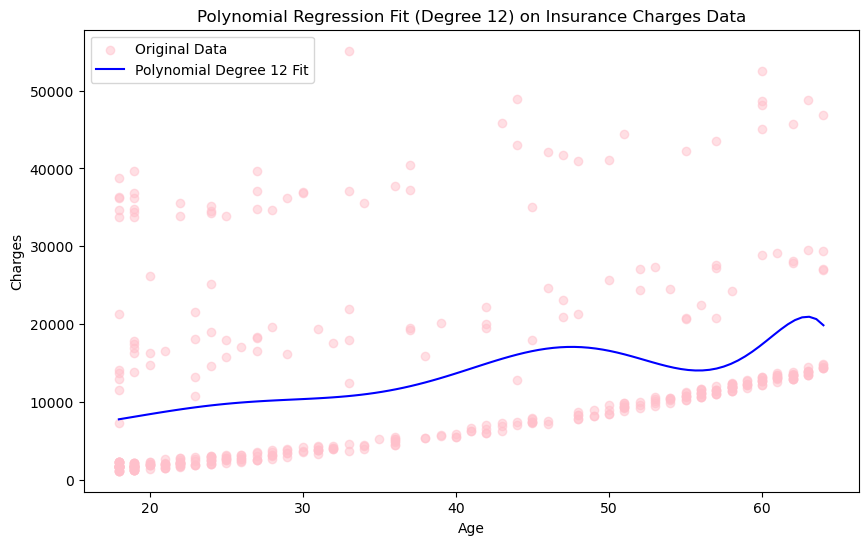

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# scatterplot
plt.figure(figsize = (10, 6))
plt.scatter(X['age'], y, color = 'pink', alpha = 0.5, label = 'Original Data')
# generate range
age_range = np.linspace(X['age'].min(), X['age'].max(), 100).reshape(-1, 1)
age_range_poly = poly.transform(age_range)
# predict charges
y_pred_line = model7.predict(age_range_poly)
# plot model
plt.plot(age_range, y_pred_line, color = 'blue', label = "Polynomial Degree 12 Fit")
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Polynomial Regression Fit (Degree 12) on Insurance Charges Data')
plt.legend()
plt.show()

## Part Four: New Data

Great news! We’ve managed to collect data about the insurance costs for a few more individuals. You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

Consider the following possible models:

* Only age as a predictor.

* age and bmi as a predictor.

* age, bmi, and smoker as predictors (no interaction terms)

* age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

* age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

For each model, fit the model on the original data.

Then, use the fitted model to predict on the new data.

Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

Make a plot showing the residuals of your final chosen model.

In [70]:
insurance2 = pd.read_csv(r"C:\Users\achur\OneDrive\Desktop\School\CP Fall 2024\544\GSB-544-2\insurance_costs_2.csv")
insurance2 = pd.get_dummies(insurance2, columns= ["sex", "smoker"], drop_first = True)

In [90]:
# only age as a predictor

X_orig = insurance[['age']]
y_orig = insurance['charges']
#make training and test sets
# X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y_orig)
# create model
modela = LinearRegression()
modela.fit(X_orig, y_orig)
# make predictions
X_new = insurance2[['age']]
y_new = insurance2['charges']
y_pred_new = modela.predict(X_new)
#calculate mse
mse_new = mean_squared_error(y_new, y_pred_new)
print("Model 1(age) MSE:", mse_new)

Model 1(age) MSE: 136077136.50195494
Model 1(age) MSE: 136077136.50195494


In [91]:
# age and bmi as predictor

X_orig = insurance[['age', 'bmi']]
y_orig = insurance['charges']
#make training and test sets
# seed = 1
# X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y_orig, test_size=0.2, random_state=seed)
# create model
model2 = LinearRegression()
model2.fit(X_orig, y_orig)
# make predictions
X_new = insurance2[['age', 'bmi']]
y_new = insurance2['charges']
y_pred_new = model2.predict(X_new)
#calculate mse
mse_new = mean_squared_error(y_new, y_pred_new)
print("Model 2(age and bmi) MSE:", mse_new)

Model 2(age and bmi) MSE: 132636406.1108129
Model 2(age and bmi) MSE: 132636406.1108129


In [92]:
# age, bmi and smoker as predictors

X_orig = insurance[['age', 'bmi', 'smoker_yes']]
y_orig = insurance['charges']
#make training and test sets
# seed = 1
# X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y_orig, test_size=0.2, random_state=seed)
# create model
model3 = LinearRegression()
model3.fit(X_orig, y_orig)
# make predictions
X_new = insurance2[['age', 'bmi', 'smoker_yes']]
y_new = insurance2['charges']
y_pred_new = model3.predict(X_new)
#calculate mse
mse_new = mean_squared_error(y_new, y_pred_new)
print("Model 3(age, bmi and smoker) MSE:", mse_new)

Model 3(age, bmi and smoker) MSE: 35377541.24141632
Model 3(age, bmi and smoker) MSE: 35377541.24141632


In [75]:
# age and bmi with interaction term of smoker

# define variables
insurance['age_smoker'] = insurance['age'] * insurance['smoker_yes']
insurance['bmi_smoker'] = insurance['bmi'] * insurance['smoker_yes']
X_orig = insurance[['age', 'bmi', 'age_smoker', 'bmi_smoker']]
y_orig = insurance['charges']
# create model
model4 = LinearRegression()
model4.fit(X_orig, y_orig)
# predictors with new data
insurance2['age_smoker'] = insurance2['age'] * insurance2['smoker_yes']
insurance2['bmi_smoker'] = insurance2['bmi'] * insurance2['smoker_yes']
X_new = insurance2[['age', 'bmi', 'age_smoker', 'bmi_smoker']]
y_new = insurance2['charges']
# predict
y_pred_new = model4.predict(X_new)
# mse
mse_new = mean_squared_error(y_new, y_pred_new)
print(f"Model 4 (age, bmi with interaction of smoker) MSE: {mse_new:.2f}")

Model 4 (age, bmi with interaction of smoker) MSE: 24795908.41
Model 4 (age, bmi with interaction of smoker) MSE: 24795908.41


In [77]:
# age and bmi and smoker with interaction term of smoker

# define variables
insurance['age_smoker'] = insurance['age'] * insurance['smoker_yes']
insurance['bmi_smoker'] = insurance['bmi'] * insurance['smoker_yes']
X_orig = insurance[['age', 'bmi', 'smoker_yes', 'age_smoker', 'bmi_smoker']]
y_orig = insurance['charges']
# create model
model5 = LinearRegression()
model5.fit(X_orig, y_orig)
# predictors with new data
insurance2['age_smoker'] = insurance2['age'] * insurance2['smoker_yes']
insurance2['bmi_smoker'] = insurance2['bmi'] * insurance2['smoker_yes']
X_new = insurance2[['age', 'bmi', 'smoker_yes', 'age_smoker', 'bmi_smoker']]
y_new = insurance2['charges']
# predict
y_pred_new = model5.predict(X_new)
# mse
mse_new = mean_squared_error(y_new, y_pred_new)
print(f"Model 5 (age, bmi, smoker with interaction of smoker) MSE: {mse_new:.2f}")

Model 5 (age, bmi, smoker with interaction of smoker) MSE: 21786256.87
Model 5 (age, bmi, smoker with interaction of smoker) MSE: 21786256.87


Model 5 is the best model for predictions because it has the lowest MSE.

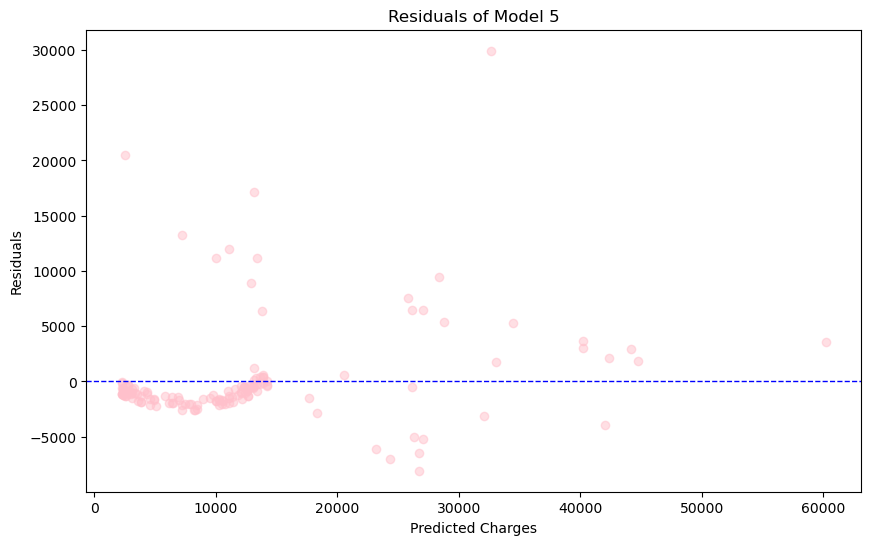

In [78]:
# residuals plot

y_new = insurance2['charges']
y_pred_new = model5.predict(X_new)

residuals = y_new - y_pred_new

plt.figure(figsize = (10,6))
plt.scatter(y_pred_new, residuals, color = 'pink', alpha = 0.5)
plt.axhline(y = 0, color = 'blue', linestyle = '--', linewidth = 1)
plt.xlabel('Predicted Charges')
plt.ylabel("Residuals")
plt.title('Residuals of Model 5')
plt.show()

## Part Five: Full Exploration

Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.

Best polynomial degree: 2
Best MSE on new data: 21549294.36
Best polynomial degree: 2
Best MSE on new data: 21549294.36


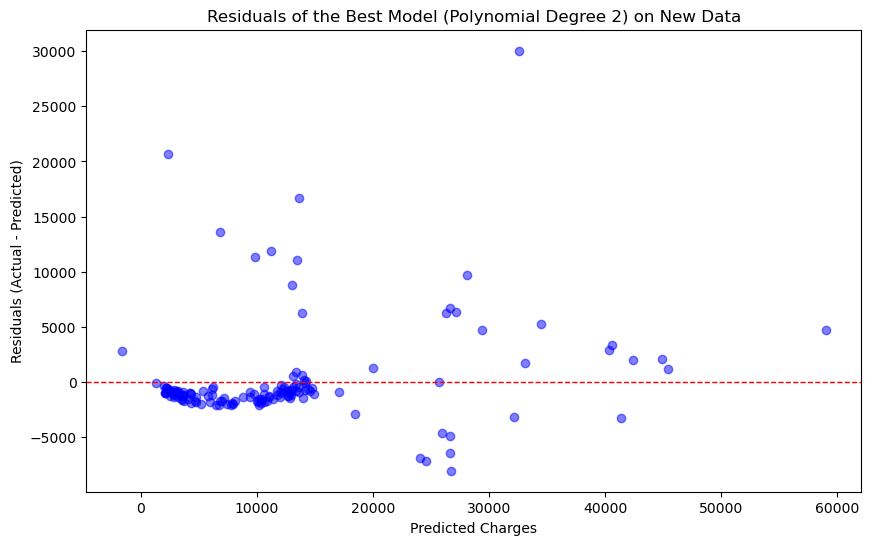

In [87]:
# best model
# define degrees for model
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
best_degree = 0
best_mse = float('inf')
best_model = None
best_poly_features = None
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_orig_poly = poly.fit_transform(insurance[['age', 'bmi', 'sex_male', 'smoker_yes']])
    y_orig = insurance['charges']
    model = LinearRegression()
    model.fit(X_orig_poly, y_orig)
    X_new_poly = poly.transform(insurance2[['age', 'bmi', 'sex_male', 'smoker_yes']])
    y_new = insurance2['charges']
    y_pred_new = model.predict(X_new_poly)
    mse_new = mean_squared_error(y_new, y_pred_new)
    if mse_new < best_mse:
        best_mse = mse_new
        best_degree = degree
        best_model = model
        best_poly_features = poly

print(f"Best polynomial degree: {best_degree}")
print(f"Best MSE on new data: {best_mse:.2f}")
X_new_best_poly = best_poly_features.transform(insurance2[['age', 'bmi', 'sex_male', 'smoker_yes']])
y_pred_best = best_model.predict(X_new_best_poly)
residuals_best = y_new - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals_best, color="blue", alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title(f"Residuals of the Best Model (Polynomial Degree {best_degree}) on New Data")
plt.show()

## Appendix and References

https://www.geeksforgeeks.org/multiple-linear-regression-with-scikit-learn/

Generative A.I. Statement: Chat-GPT was used to suggest changes in code to debug errors. An example of errors include, incorrect syntax, incorrect usage of parameters for plots, making suggestions to fix parameters to resolve the error in code. Chat-GPT was only used to resolve errors in already hand written code. 